# Homework Unsupervised Learning Clustering

## Import Library

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [161]:
# Load from Local
data = pd.read_csv('College.csv')

## See Data

In [162]:
# See data
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [163]:
# See how many row and columns
data.shape

(777, 19)

In [164]:
# Understanding Variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [165]:
## See statistical summary
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Data Cleaning

In [166]:
# Drop Duplicate Data
data = data.drop_duplicates()

In [167]:
# See how many row and columns after drop duplicate data
data.shape

# There are not duplicate data

(777, 19)

In [168]:
# Check missing value
data.isnull().sum()

# There are no missing value

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Check Distribution Data and Outlier

##### Variable which are have allowed outliers (because total students and capacity every campus are different):
1. Apps
2. Accept
3. Enroll
4. F.Undergrad
5. P.Undergrad

##### Variable which are have allowed outliers (because fee every states have different price):
6. Outstate
7. Room.Board
8. Books
9. Personal
10. Expend

##### Variable which are have allowed outliers (because total PhD and Terminal every campus have are different):
11. PhD
12. Terminal

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


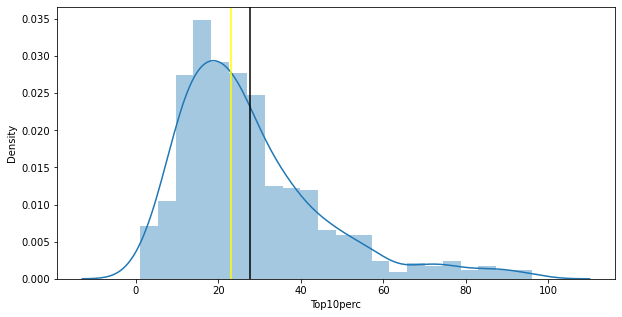

In [169]:
# Look Distribution of Top10perc
plt.figure(figsize=(10,5))
sns.distplot(data['Top10perc'])
plt.axvline(data['Top10perc'].median(),color='yellow')
plt.axvline(data['Top10perc'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


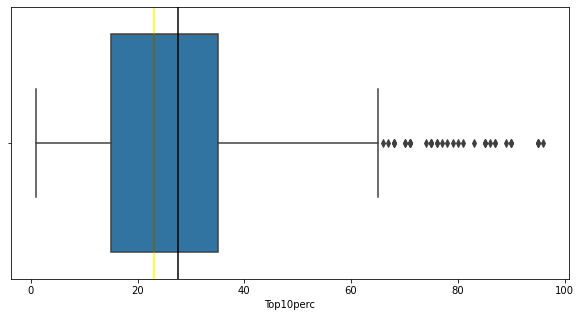

In [170]:
# Look Distribution of Top10perc with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Top10perc'])
plt.axvline(data['Top10perc'].median(),color='yellow')
plt.axvline(data['Top10perc'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


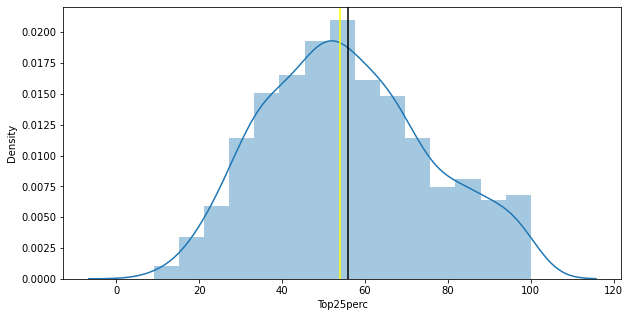

In [171]:
# Look Distribution of Top25perc
plt.figure(figsize=(10,5))
sns.distplot(data['Top25perc'])
plt.axvline(data['Top25perc'].median(),color='yellow')
plt.axvline(data['Top25perc'].mean(),color='black')
plt.show()
# there are no outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


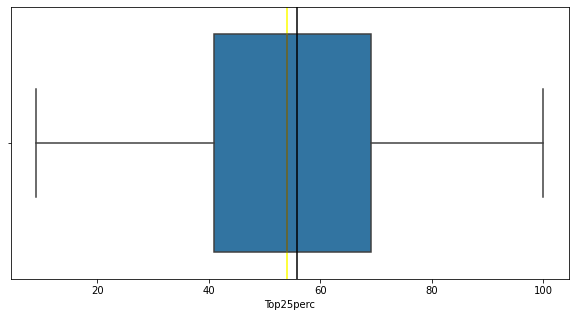

In [172]:
# Look Distribution of Top25perc with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Top25perc'])
plt.axvline(data['Top25perc'].median(),color='yellow')
plt.axvline(data['Top25perc'].mean(),color='black')
plt.show()
# there are no outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


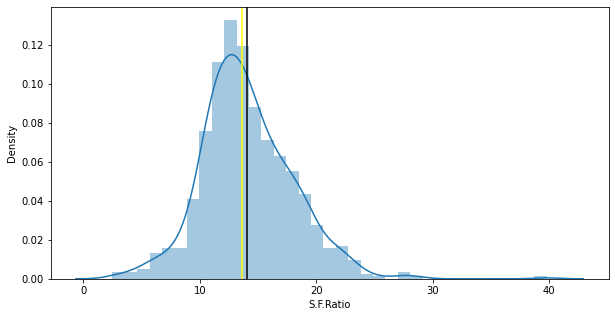

In [173]:
# Look Distribution of S.F.Ratio
plt.figure(figsize=(10,5))
sns.distplot(data['S.F.Ratio'])
plt.axvline(data['S.F.Ratio'].median(),color='yellow')
plt.axvline(data['S.F.Ratio'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


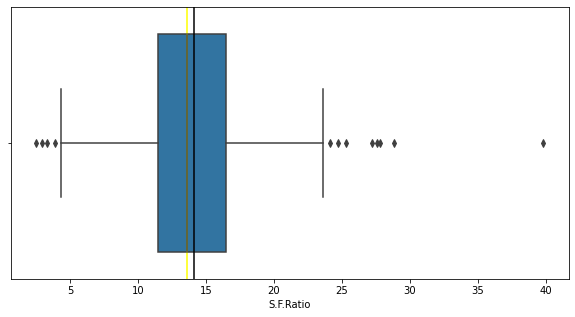

In [174]:
# Look Distribution of S.F.Ratio with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['S.F.Ratio'])
plt.axvline(data['S.F.Ratio'].median(),color='yellow')
plt.axvline(data['S.F.Ratio'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


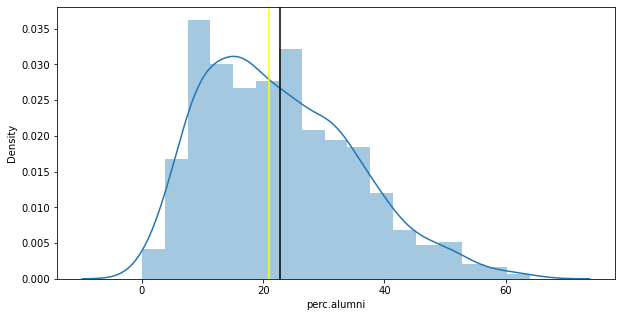

In [175]:
# Look Distribution of perc.alumni
plt.figure(figsize=(10,5))
sns.distplot(data['perc.alumni'])
plt.axvline(data['perc.alumni'].median(),color='yellow')
plt.axvline(data['perc.alumni'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


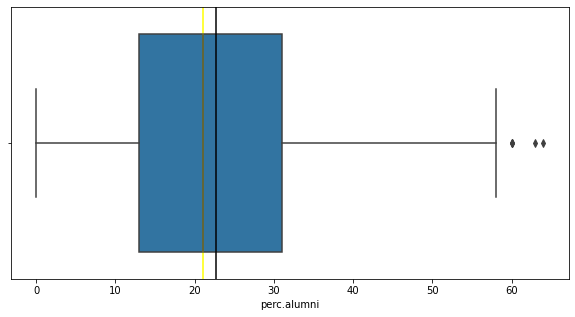

In [176]:
# Look Distribution of perc.alumni with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['perc.alumni'])
plt.axvline(data['perc.alumni'].median(),color='yellow')
plt.axvline(data['perc.alumni'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


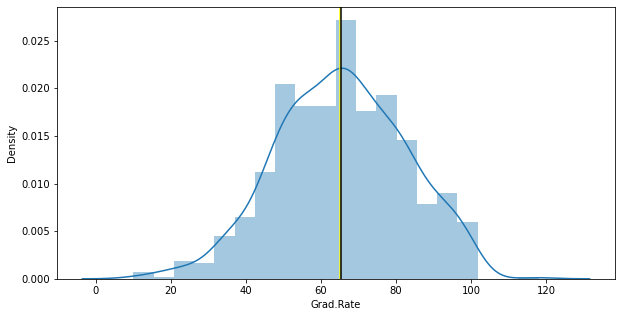

In [177]:
# Look Distribution of Grad.Rate
plt.figure(figsize=(10,5))
sns.distplot(data['Grad.Rate'])
plt.axvline(data['Grad.Rate'].median(),color='yellow')
plt.axvline(data['Grad.Rate'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


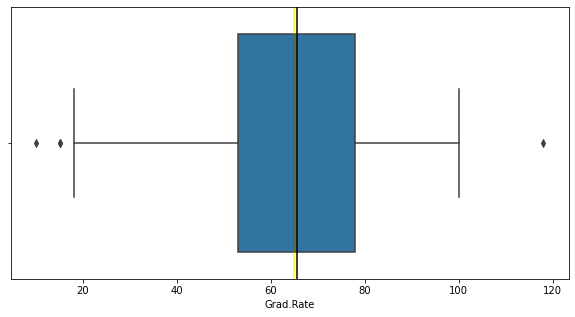

In [178]:
# Look Distribution of Grad.Rate with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Grad.Rate'])
plt.axvline(data['Grad.Rate'].median(),color='yellow')
plt.axvline(data['Grad.Rate'].mean(),color='black')
plt.show()
# there are several outlier in this column
# better use median to impute outlier in this column

In [179]:
# Make function to detect outlier using IQR Method
def check_outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(data[data>upper_range])+len(data[data<lower_range])
    print("Total number of Outlier From Variable {} : {}".format(data.name, number_outlier))
    print("Upper Range Outlier From Variable {} : {}".format(data.name, len(data[data>upper_range])))    
    print("Lower Range Outlier From Variable {} : {}\n".format(data.name, len(data[data<lower_range])))

In [180]:
check_outlier(data['Top10perc'])
check_outlier(data['Top25perc'])
check_outlier(data['S.F.Ratio'])
check_outlier(data['perc.alumni'])
check_outlier(data['Grad.Rate'])

Total number of Outlier From Variable Top10perc : 39
Upper Range Outlier From Variable Top10perc : 39
Lower Range Outlier From Variable Top10perc : 0

Total number of Outlier From Variable Top25perc : 0
Upper Range Outlier From Variable Top25perc : 0
Lower Range Outlier From Variable Top25perc : 0

Total number of Outlier From Variable S.F.Ratio : 12
Upper Range Outlier From Variable S.F.Ratio : 8
Lower Range Outlier From Variable S.F.Ratio : 4

Total number of Outlier From Variable perc.alumni : 5
Upper Range Outlier From Variable perc.alumni : 5
Lower Range Outlier From Variable perc.alumni : 0

Total number of Outlier From Variable Grad.Rate : 4
Upper Range Outlier From Variable Grad.Rate : 1
Lower Range Outlier From Variable Grad.Rate : 3



## Handling Outlier

In [181]:
#See observation outliers on the Top10perc
Q1=data["Top10perc"].quantile(0.25)
Q3=data["Top10perc"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['Top10perc']>upper_range),'Top10perc']=upper_range
check_outlier(data['Top10perc'])

Total number of Outlier From Variable Top10perc : 0
Upper Range Outlier From Variable Top10perc : 0
Lower Range Outlier From Variable Top10perc : 0



In [182]:
#See observation outliers on the S.F.Ratio
Q1=data["S.F.Ratio"].quantile(0.25)
Q3=data["S.F.Ratio"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['S.F.Ratio']>upper_range),'S.F.Ratio']=upper_range
data.loc[(data['S.F.Ratio']<lower_range),'S.F.Ratio']=lower_range
check_outlier(data['S.F.Ratio'])

Total number of Outlier From Variable S.F.Ratio : 0
Upper Range Outlier From Variable S.F.Ratio : 0
Lower Range Outlier From Variable S.F.Ratio : 0



In [183]:
#See observation outliers on the perc.alumni
Q1=data["perc.alumni"].quantile(0.25)
Q3=data["perc.alumni"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['perc.alumni']>upper_range),'perc.alumni']=upper_range
check_outlier(data['perc.alumni'])

Total number of Outlier From Variable perc.alumni : 0
Upper Range Outlier From Variable perc.alumni : 0
Lower Range Outlier From Variable perc.alumni : 0



In [184]:
#See observation outliers on the Grad.Rate
Q1=data["Grad.Rate"].quantile(0.25)
Q3=data["Grad.Rate"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['Grad.Rate']>upper_range),'Grad.Rate']=upper_range
data.loc[(data['Grad.Rate']<lower_range),'Grad.Rate']=lower_range
check_outlier(data['Grad.Rate'])

Total number of Outlier From Variable Grad.Rate : 0
Upper Range Outlier From Variable Grad.Rate : 0
Lower Range Outlier From Variable Grad.Rate : 0



## Data Preparation

#### Encode data

Numerical Columns
1. Unnamed: 0
2. Apps
3. Accept
4. Enroll
5. Top10perc
6. Top25perc
7. F.Undergrad
8. P.Undergrad
9. Outstate
10. Room.Board
11. Books
12. Personal
13. PhD
14. Terminal
15. S.F.Ratio
16. perc.alumni
17. Expend
18. Grad.Rate

Biner Category Columns
1. Private = Yes, No

In [185]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['Unnamed: 0']
num_cols   = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad',
              'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

#Biner category columns
bin_cols   = ['Private']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

In [186]:
# Check data after encode data
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23.0,52,2885,537,7440,3300,450,2200,70,78,18.1,12.0,7041,60.0
1,Adelphi University,1,2186,1924,512,16.0,29,2683,1227,12280,6450,750,1500,29,30,12.2,16.0,10527,56.0
2,Adrian College,1,1428,1097,336,22.0,50,1036,99,11250,3750,400,1165,53,66,12.9,30.0,8735,54.0
3,Agnes Scott College,1,417,349,137,60.0,89,510,63,12960,5450,450,875,92,97,7.7,37.0,19016,59.0
4,Alaska Pacific University,1,193,146,55,16.0,44,249,869,7560,4120,800,1500,76,72,11.9,2.0,10922,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4.0,26,3089,2029,6797,3900,500,1200,60,60,21.0,14.0,4469,40.0
773,Xavier University,1,1959,1805,695,24.0,47,2849,1107,11520,4960,600,1250,73,75,13.3,31.0,9189,83.0
774,Xavier University of Louisiana,1,2097,1915,695,34.0,61,2793,166,6900,4200,617,781,67,75,14.4,20.0,8323,49.0
775,Yale University,1,10705,2453,1317,65.0,99,5217,83,19840,6510,630,2115,96,96,5.8,49.0,40386,99.0


#### Data Scaling

In [187]:
# Import the StandardScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad',
              'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])

In [188]:
# Check data after scaling
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,0.032887,0.044177,0.107913,0.343750,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.705,0.206897,0.072671,0.445
1,Adelphi University,1,0.043842,0.070531,0.075035,0.234375,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.410,0.275862,0.138387,0.405
2,Adrian College,1,0.028055,0.039036,0.047349,0.328125,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.445,0.517241,0.104605,0.385
3,Agnes Scott College,1,0.006998,0.010549,0.016045,0.921875,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.185,0.637931,0.298415,0.435
4,Alaska Pacific University,1,0.002333,0.002818,0.003146,0.234375,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.395,0.034483,0.145833,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,0.044071,0.054955,0.079912,0.046875,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.850,0.241379,0.024186,0.245
773,Xavier University,1,0.039114,0.065999,0.103823,0.359375,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.465,0.534483,0.113164,0.675
774,Xavier University of Louisiana,1,0.041989,0.070188,0.103823,0.515625,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.520,0.344828,0.096839,0.335
775,Yale University,1,0.221273,0.090677,0.201667,1.000000,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.090,0.844828,0.701265,0.835


## K-Means Clustering PhD vs Grad.Rate

In [189]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    int32  
 2   Apps         777 non-null    float64
 3   Accept       777 non-null    float64
 4   Enroll       777 non-null    float64
 5   Top10perc    777 non-null    float64
 6   Top25perc    777 non-null    float64
 7   F.Undergrad  777 non-null    float64
 8   P.Undergrad  777 non-null    float64
 9   Outstate     777 non-null    float64
 10  Room.Board   777 non-null    float64
 11  Books        777 non-null    float64
 12  Personal     777 non-null    float64
 13  PhD          777 non-null    float64
 14  Terminal     777 non-null    float64
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    float64
 17  Expend       777 non-null    float64
 18  Grad.Rate    777 non-null    float64
dtypes: float

In [198]:
# PhD vs Graduation Rate
X = data.iloc[:, [13,18]].values
X

array([[0.65263158, 0.445     ],
       [0.22105263, 0.405     ],
       [0.47368421, 0.385     ],
       ...,
       [0.62105263, 0.335     ],
       [0.92631579, 0.835     ],
       [0.70526316, 0.835     ]])

## Elbow Method

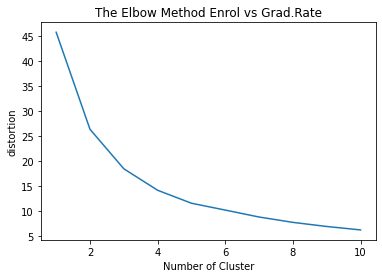

In [199]:
from sklearn.cluster import KMeans

distortion = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)

plt.plot(range(1,11), distortion)
plt.title('The Elbow Method Enrol vs Grad.Rate')
plt.xlabel('Number of Cluster')
plt.ylabel('distortion')
plt.show()

I Choose 5 for Number of Cluster

In [200]:
# Modeling Cluster

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 4, 4, 0, 2, 2, 0, 0, 3, 4, 0, 1, 1, 0, 4, 0, 3, 4, 2, 2, 2, 0,
       1, 2, 2, 4, 3, 0, 2, 0, 1, 0, 4, 1, 1, 1, 3, 3, 0, 1, 0, 3, 2, 2,
       0, 4, 2, 4, 3, 0, 2, 2, 2, 4, 0, 2, 1, 2, 2, 0, 3, 0, 4, 3, 3, 2,
       2, 4, 1, 2, 3, 3, 3, 1, 3, 1, 0, 2, 2, 0, 3, 0, 2, 0, 1, 4, 3, 0,
       1, 1, 0, 0, 3, 2, 0, 1, 1, 4, 4, 0, 4, 0, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 3, 3, 1, 3, 0, 2, 0, 1, 3, 3, 1, 2, 1, 3, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 3, 0, 2, 1, 3, 2, 2, 4, 1, 3, 1, 0, 3, 4,
       4, 2, 4, 1, 3, 3, 4, 4, 3, 3, 3, 4, 4, 2, 4, 1, 2, 3, 3, 0, 3, 3,
       2, 2, 2, 4, 2, 1, 1, 1, 0, 1, 0, 1, 0, 4, 3, 3, 2, 0, 2, 0, 3, 2,
       4, 1, 0, 0, 1, 0, 4, 3, 2, 2, 1, 4, 4, 1, 4, 3, 4, 2, 1, 4, 2, 0,
       2, 3, 0, 2, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 0, 2, 4, 3, 1, 0, 3, 1,
       3, 0, 0, 1, 0, 2, 1, 0, 3, 3, 4, 0, 3, 1, 3, 0, 0, 0, 1, 0, 2, 2,
       4, 1, 0, 2, 0, 2, 3, 1, 1, 2, 0, 4, 1, 0, 1, 3, 4, 2, 1, 3, 3, 2,
       4, 3, 2, 1, 0, 1, 3, 4, 1, 1, 3, 4, 3, 3, 0,

In [201]:
# Add new cluster column
data['cluster'] = y_kmeans
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,1,0.032887,0.044177,0.107913,0.343750,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.705,0.206897,0.072671,0.445,2
1,Adelphi University,1,0.043842,0.070531,0.075035,0.234375,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.410,0.275862,0.138387,0.405,4
2,Adrian College,1,0.028055,0.039036,0.047349,0.328125,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.445,0.517241,0.104605,0.385,4
3,Agnes Scott College,1,0.006998,0.010549,0.016045,0.921875,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.185,0.637931,0.298415,0.435,0
4,Alaska Pacific University,1,0.002333,0.002818,0.003146,0.234375,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.395,0.034483,0.145833,0.000,2


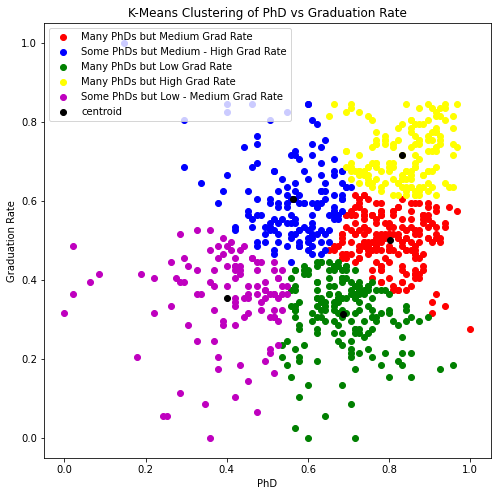

In [206]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], c='red', label='Many PhDs but Medium Grad Rate')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], c='blue', label='Some PhDs but Medium - High Grad Rate')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], c='green', label='Many PhDs but Low Grad Rate')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], c='yellow', label='Many PhDs but High Grad Rate')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], c='m', label='Some PhDs but Low - Medium Grad Rate')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='black', label='centroid')
plt.title('K-Means Clustering of PhD vs Graduation Rate')
plt.xlabel('PhD')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()

## Evaluation from K-Means Clustering
From this unsupervised learning K-Means Clustering, we can evaluate that, several campus which are have many PhD Lecturers, but have low - high graduation rate (scattered). Several campus which are have some PhD Lecturers, but have Low - Medium clustering graduation rate. It depends on its learning method at campus too

## Hierarchical Clustering

In [207]:
# Drop Label Unnamed: 0
data=data.drop(labels="Unnamed: 0",axis=1)
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,1,0.032887,0.044177,0.107913,0.343750,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.705,0.206897,0.072671,0.445,2
1,1,0.043842,0.070531,0.075035,0.234375,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.410,0.275862,0.138387,0.405,4
2,1,0.028055,0.039036,0.047349,0.328125,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.445,0.517241,0.104605,0.385,4
3,1,0.006998,0.010549,0.016045,0.921875,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.185,0.637931,0.298415,0.435,0
4,1,0.002333,0.002818,0.003146,0.234375,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.395,0.034483,0.145833,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,0.044071,0.054955,0.079912,0.046875,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.850,0.241379,0.024186,0.245,2
773,1,0.039114,0.065999,0.103823,0.359375,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.465,0.534483,0.113164,0.675,1
774,1,0.041989,0.070188,0.103823,0.515625,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.520,0.344828,0.096839,0.335,2
775,1,0.221273,0.090677,0.201667,1.000000,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.090,0.844828,0.701265,0.835,3


In [208]:
# Normalize
from sklearn.preprocessing import normalize

df = normalize(data)
df = pd.DataFrame(df, columns=data.columns)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,0.370661,0.012190,0.016375,0.039999,0.127415,0.175148,0.032308,0.009099,0.097643,0.088809,0.058473,0.110350,0.241905,0.263365,0.261316,0.076689,0.026936,0.164944,0.741323
1,0.232277,0.010184,0.016383,0.017429,0.054440,0.051050,0.018757,0.013042,0.119258,0.170986,0.067696,0.044328,0.051345,0.018338,0.095234,0.064076,0.032144,0.094072,0.929109
2,0.230531,0.006468,0.008999,0.010915,0.075643,0.103865,0.006564,0.001035,0.106097,0.071587,0.031231,0.032204,0.109199,0.127399,0.102586,0.119240,0.024115,0.088754,0.922123
3,0.418241,0.002927,0.004412,0.006711,0.385565,0.367684,0.004925,0.001188,0.229427,0.241952,0.065979,0.039908,0.369813,0.401731,0.077374,0.266809,0.124809,0.181935,0.000000
4,0.388140,0.000905,0.001094,0.001221,0.090970,0.149284,0.001355,0.015430,0.104653,0.143166,0.121769,0.074072,0.277826,0.245141,0.153315,0.013384,0.056604,0.000000,0.776279


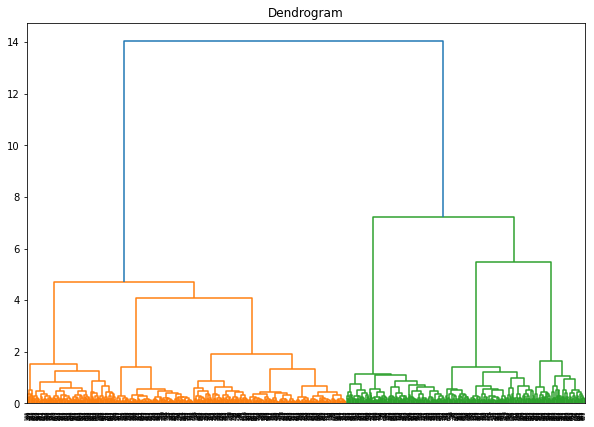

In [209]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df, method ='ward'))

There are 2 cluster from Hierarchical Clustering

## Agglomerative Clustering

In [210]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [211]:
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,

## Visualize

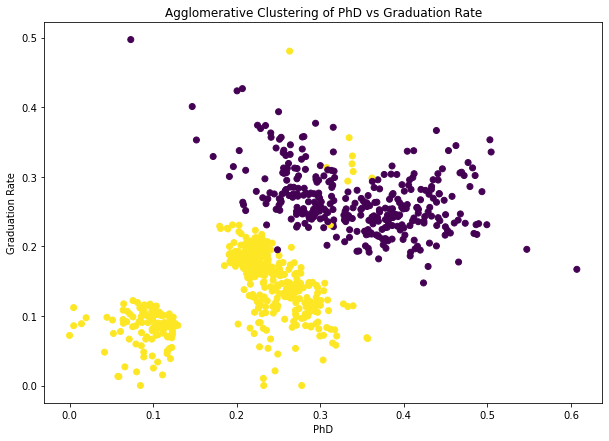

In [213]:
plt.figure(figsize=(10, 7))
plt.scatter(df['PhD'], df['Grad.Rate'], c=cluster.labels_)
plt.title('Agglomerative Clustering of PhD vs Graduation Rate')
plt.xlabel('PhD')
plt.ylabel('Graduation Rate')
plt.show()

## Evaluation from Agglomerative Clustering
From this unsupervised learning Agglomerative Clustering, we can evaluate that, several campus which are have many PhD Lecturers, have medium - high graduation rate (scattered). Several campus which are have some PhD Lecturers, have Low - Medium clustering graduation rate. Several campus which are have few PhD Lecturers, but have Low clustering graduation rate.  It depends on its learning method at campus too